In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

In [2]:
# File to Load (Remember to Change These)
mdd = "data/mouse_drug_data.csv"
ctd = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mdd_df = pd.read_csv(mdd)
ctd_df = pd.read_csv(ctd)
# mdd_df.head(20)
# ctd_df.head(20)

In [3]:
# Combine the data into a single dataset
master_df = pd.merge(mdd_df, ctd_df, on="Mouse ID")

# Display the data table for preview
master_df.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


In [4]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
# Convert to DataFrame
tumor_df = master_df.loc[:,['Drug', 'Timepoint', 'Tumor Volume (mm3)']]

# Preview DataFrame 
tumor_df.head()



,Drug,Timepoint,Tumor Volume (mm3)
0,Stelasyn,0,45.000000
1,Stelasyn,5,47.313491
2,Stelasyn,10,47.904324
3,Stelasyn,15,48.735197
4,Stelasyn,20,51.112713


In [5]:
# Store the sem and mean of Tumor Volumes Grouped by Drug and Timepoint
tumor_mean_sem = tumor_df.groupby(['Drug', 'Timepoint']).agg({"Tumor Volume (mm3)" :["mean","sem"]})

# Preview DataFrame 
tumor_mean_sem.head()


Tumor Volume (mm3)          
                                  mean       sem
Drug      Timepoint                             
Capomulin 0                  45.000000  0.000000
          5                  44.266086  0.448593
          10                 43.084291  0.702684
          15                 42.064317  0.838617
          20                 40.716325  0.909731

In [6]:
#reformat df
tumor_plot = tumor_mean_sem.unstack(-1)
tumor_plot


Tumor Volume (mm3)                                              \
                        mean                                               
Timepoint                 0          5          10         15         20   
Drug                                                                       
Capomulin               45.0  44.266086  43.084291  42.064317  40.716325   
Ceftamin                45.0  46.503051  48.285125  50.094055  52.157049   
Infubinol               45.0  47.062001  49.403909  51.296397  53.197691   
Ketapril                45.0  47.389175  49.582269  52.399974  54.920935   
Naftisol                45.0  46.796098  48.694210  50.933018  53.644087   
Placebo                 45.0  47.125589  49.423329  51.359742  54.364417   
Propriva                45.0  47.248967  49.101541  51.067318  53.346737   
Ramicane                45.0  43.944859  42.531957  41.495061  40.238325   
Stelasyn                45.0  47.527452  49.463844  51.529409  54.067395   
Zoniferol               45.0  46.851818  48.689881  50.779059  53.170334   

                                                                       \
                                                                  sem   
Timepoint         25         30         35         40         45   0    
Drug                                                                    
Capomulin  39.939528  38.769339  37.816839  36.958001  36.236114  0.0   
Ceftamin   54.287674  56.769517  58.827548  61.467895  64.132421  0.0   
Infubinol  55.715252  58.299397  60.742461  63.162824  65.755562  0.0   
Ketapril   57.678982  60.994507  63.371686  66.068580  70.662958  0.0   
Naftisol   56.731968  59.559509  62.685087  65.600754  69.265506  0.0   
Placebo    57.482574  59.809063  62.420615  65.052675  68.084082  0.0   
Propriva   55.504138  58.196374  60.350199  63.045537  66.258529  0.0   
Ramicane   38.974300  38.703137  37.451996  36.574081  34.955595  0.0   
Stelasyn   56.166123  59.826738  62.440699  65.356386  68.438310  0.0   
Zoniferol  55.432935  57.713531  60.089372  62.916692  65.960888  0.0   

                                                                       \
                                                                        
Timepoint        5         10        15        20        25        30   
Drug                                                                    
Capomulin  0.448593  0.702684  0.838617  0.909731  0.881642  0.934460   
Ceftamin   0.164505  0.236144  0.332053  0.359482  0.439356  0.490620   
Infubinol  0.235102  0.282346  0.357705  0.476210  0.550315  0.631061   
Ketapril   0.264819  0.357421  0.580268  0.726484  0.755413  0.934121   
Naftisol   0.202385  0.319415  0.444378  0.595260  0.813706  0.975496   
Placebo    0.218091  0.402064  0.614461  0.839609  1.034872  1.218231   
Propriva   0.231708  0.376195  0.466109  0.555181  0.577401  0.746045   
Ramicane   0.482955  0.720225  0.770432  0.786199  0.746991  0.864906   
Stelasyn   0.239862  0.433678  0.493261  0.621889  0.741922  0.899548   
Zoniferol  0.188950  0.263949  0.370544  0.533182  0.602513  0.800043   

                                         
                                         
Timepoint        35        40        45  
Drug                                     
Capomulin  1.052241  1.223608  1.223977  
Ceftamin   0.692248  0.708505  0.902358  
Infubinol  0.984155  1.055220  1.144427  
Ketapril   1.127867  1.158449  1.453186  
Naftisol   1.013769  1.118567  1.416363  
Placebo    1.287481  1.370634  1.351726  
Propriva   1.084929  1.564779  1.888586  
Ramicane   0.967433  1.128445  1.226805  
Stelasyn   1.003186  1.410435  1.576556  
Zoniferol  0.881426  0.998515  1.003576

In [7]:
# Create lists of the tumor volume means for each of the four drugs being compared
cap_tvmean_list = tumor_mean_sem.loc['Capomulin'].loc[:, 'Tumor Volume (mm3)'].loc[:,'mean'].tolist()
inf_tvmean_list = tumor_mean_sem.loc['Infubinol'].loc[:, 'Tumor Volume (mm3)'].loc[:,'mean'].tolist()
ket_tvmean_list = tumor_mean_sem.loc['Ketapril'].loc[:, 'Tumor Volume (mm3)'].loc[:,'mean'].tolist()
plc_tvmean_list = tumor_mean_sem.loc['Placebo'].loc[:, 'Tumor Volume (mm3)'].loc[:,'mean'].tolist()

In [8]:
# Create lists of the tumor volume sems for each of the four drugs being compared
cap_tvsem_list = tumor_mean_sem.loc['Capomulin'].loc[:, 'Tumor Volume (mm3)'].loc[:,'sem'].tolist()
inf_tvsem_list = tumor_mean_sem.loc['Infubinol'].loc[:, 'Tumor Volume (mm3)'].loc[:,'sem'].tolist()
ket_tvsem_list = tumor_mean_sem.loc['Ketapril'].loc[:, 'Tumor Volume (mm3)'].loc[:,'sem'].tolist()
plc_tvsem_list = tumor_mean_sem.loc['Placebo'].loc[:, 'Tumor Volume (mm3)'].loc[:,'sem'].tolist()

(0, 47)

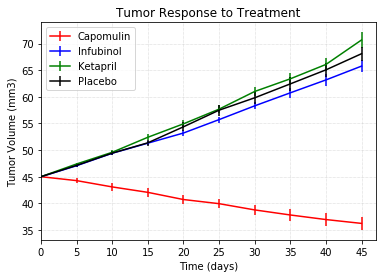

In [9]:
# Scatter plot showing how tumor volume changes over time for each treatment
ax = plt.subplot(111)

# Set the x axis from 0 to 45 in increments of 5
x_axis = np.arange(0, 50, 5)


# Set the plot title and axes titles
plt.title("Tumor Response to Treatment")
plt.xlabel("Time (days)")
plt.ylabel("Tumor Volume (mm3)")

ax.errorbar(x_axis, cap_tvmean_list, yerr=cap_tvsem_list, fmt="red",
                   label="Capomulin")
ax.errorbar(x_axis, inf_tvmean_list, yerr=inf_tvsem_list, fmt="blue",
                   label="Infubinol")
ax.errorbar(x_axis, ket_tvmean_list, yerr=ket_tvsem_list, fmt="green",
                   label="Ketapril")
ax.errorbar(x_axis, plc_tvmean_list, yerr=plc_tvsem_list, fmt="black",
                   label="Placebo")

# Add the legend, tick specificity, gridlines, and limits.
ax.legend(loc=2)
tick_locations = [value for value in x_axis]
ax.set_xticks(tick_locations)
ax.grid('on', which='major', axis='both', linestyle='dotted', linewidth=0.5)
plt.xlim(0, max(x_axis)+2)

In [10]:
# For tumor_vol_df extract only columns "Drug", "Timepoint" and "Metastic Sites"
meta_sites_df = master_df.loc[:,['Drug', 'Timepoint', 'Metastatic Sites']]
meta_sites_df.head()

,Drug,Timepoint,Metastatic Sites
0,Stelasyn,0,0
1,Stelasyn,5,0
2,Stelasyn,10,0
3,Stelasyn,15,1
4,Stelasyn,20,2


In [11]:
# Group meta_sites_df by 'Drug' and 'Timepoint'
# Calculate mean and standard error of the mean (sem) for the 'Metastatic Sites'
mean_sem_meta = meta_sites_df.groupby(['Drug', 'Timepoint']).agg({"Metastatic Sites" :["mean", "sem"]})
mean_sem_meta.head()

Metastatic Sites          
                                mean       sem
Drug      Timepoint                           
Capomulin 0                 0.000000  0.000000
          5                 0.160000  0.074833
          10                0.320000  0.125433
          15                0.375000  0.132048
          20                0.652174  0.161621

In [12]:
# Create lists of the metastatic sites means for each of the four drugs being compared
cap_mtmean_list = mean_sem_meta.loc['Capomulin'].loc[:, 'Metastatic Sites'].loc[:,'mean'].tolist()
inf_mtmean_list = mean_sem_meta.loc['Infubinol'].loc[:, 'Metastatic Sites'].loc[:,'mean'].tolist()
ket_mtmean_list = mean_sem_meta.loc['Ketapril'].loc[:, 'Metastatic Sites'].loc[:,'mean'].tolist()
plc_mtmean_list = mean_sem_meta.loc['Placebo'].loc[:, 'Metastatic Sites'].loc[:,'mean'].tolist()

In [13]:
# Create lists of the metastatic sites sems for each of the four drugs being compared
cap_mtsem_list = mean_sem_meta.loc['Capomulin'].loc[:, 'Metastatic Sites'].loc[:,'sem'].tolist()
inf_mtsem_list = mean_sem_meta.loc['Infubinol'].loc[:, 'Metastatic Sites'].loc[:,'sem'].tolist()
ket_mtsem_list = mean_sem_meta.loc['Ketapril'].loc[:, 'Metastatic Sites'].loc[:,'sem'].tolist()
plc_mtsem_list = mean_sem_meta.loc['Placebo'].loc[:, 'Metastatic Sites'].loc[:,'sem'].tolist()

(0, 47)

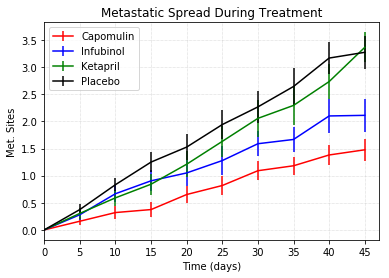

In [14]:
# Scatter plot showing metastatic spread over time for each treatment
ax = plt.subplot(111)

# Set the x axis from 0 to 45 in increments of 5
x_axis = np.arange(0, 50, 5)

# Set the plot title and axes titles
plt.title("Metastatic Spread During Treatment")
plt.xlabel("Time (days)")
plt.ylabel("Met. Sites")

# Plot the 'mean' list vs. the established x axis with error 
ax.errorbar(x_axis, cap_mtmean_list, yerr=cap_mtsem_list, fmt="red",
                   label="Capomulin")
ax.errorbar(x_axis, inf_mtmean_list, yerr=inf_mtsem_list, fmt="blue",
                   label="Infubinol")
ax.errorbar(x_axis, ket_mtmean_list, yerr=ket_mtsem_list, fmt="green",
                   label="Ketapril")
ax.errorbar(x_axis, plc_mtmean_list, yerr=plc_mtsem_list, fmt="black",
                   label="Placebo")

# Add the legend, tick specificity, gridlines, and limits.
ax.legend(loc=2)
tick_locations = [value for value in x_axis]
ax.set_xticks(tick_locations)
ax.grid('on', which='major', axis='both', linestyle='dotted', linewidth=0.5)
plt.xlim(0, max(x_axis)+2)

In [15]:
# Get the mouse survival rate over time grouped by 'Drug' and 'Mouse ID'
mouse_count = master_df.groupby(['Drug', 'Timepoint'])['Mouse ID'].count()
mouse_count.head()

Drug       Timepoint
Capomulin  0            25
           5            25
           10           25
           15           24
           20           23
Name: Mouse ID, dtype: int64

In [16]:
 # Create lists of the mouse counts for each of the four drugs at the different timepoints
cap_surv_list = mouse_count.loc['Capomulin'].tolist()
inf_surv_list = mouse_count.loc['Infubinol'].tolist()
ket_surv_list = mouse_count.loc['Ketapril'].tolist()
plc_surv_list = mouse_count.loc['Placebo'].tolist()

In [17]:
# List comprehension to get the mouse survival rate
# Each value in the lists is divided by the first value of the respective list to get a percentage
cap_surv_rate = [(x/cap_surv_list[0])*100 for x in cap_surv_list]
inf_surv_rate = [(x/inf_surv_list[0])*100 for x in inf_surv_list]
ket_surv_rate = [(x/ket_surv_list[0])*100 for x in ket_surv_list]
plc_surv_rate = [(x/plc_surv_list[0])*100 for x in plc_surv_list]

(0, 47)

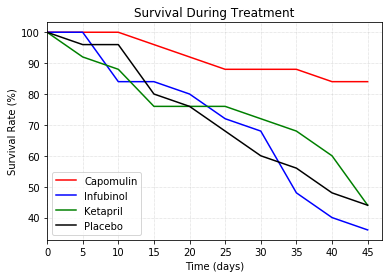

In [18]:

# Scatter plot showing mouse survival rate over time for each treatment# Scatte 

ax = plt.subplot(111)

# Set the x axis from 0 to 45 in increments of 5
x_axis = np.arange(0, 50, 5)

# Set the plot title and axes titles
plt.title("Survival During Treatment")
plt.xlabel("Time (days)")
plt.ylabel("Survival Rate (%)")

# Plot the 'mean' list vs. the established x axis with error 
ax.plot(x_axis, cap_surv_rate, color="red", label="Capomulin")
ax.plot(x_axis, inf_surv_rate, color="blue", label="Infubinol")
ax.plot(x_axis, ket_surv_rate, color="green", label="Ketapril")
ax.plot(x_axis, plc_surv_rate, color="black", label="Placebo")

# Add the legend, tick specificity, gridlines, and limits.
ax.legend(loc=3)
tick_locations = [value for value in x_axis]
ax.set_xticks(tick_locations)
ax.grid('on', which='major', axis='both', linestyle='dotted', linewidth=0.5)
plt.xlim(0, max(x_axis)+2)

In [19]:
# compares the total % tumor volume change for each drug across the full 45 days.
cap_tv_change = int(((cap_tvmean_list[-1] - cap_tvmean_list[0])/cap_tvmean_list[0])*100)
inf_tv_change = int(((inf_tvmean_list[-1] - inf_tvmean_list[0])/inf_tvmean_list[0])*100)
ket_tv_change = int(((ket_tvmean_list[-1] - ket_tvmean_list[0])/ket_tvmean_list[0])*100)
plc_tv_change = int(((plc_tvmean_list[-1] - plc_tvmean_list[0])/plc_tvmean_list[0])*100)

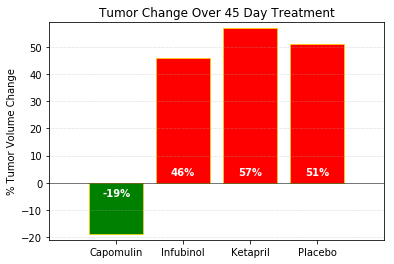

In [20]:
# Bar graph showing tumor growth % over time for each treatment

# y values using a list
y = [cap_tv_change, inf_tv_change, ket_tv_change, plc_tv_change]
# Set the x axis from 0 to 45 in increments of 5
x_axis = np.arange(len(y))

# Set the colors of the bars depending on if pos or neg
# Neg % are green
# Pos % are red
colors = []
for item in y:
    if item < 0:
        colors.append('green')
    else:
        colors.append('red')

# Set up the bar graph 
tumor_growth_bar = plt.bar(x_axis, y, color=colors, alpha=1.0, edgecolor='gold', linewidth=0.7)

# Set the plot title and axes titles
plt.title("Tumor Change Over 45 Day Treatment")
plt.ylabel("% Tumor Volume Change")

# plt.xticks() set the location and labels of the ticks on the x axis
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Capomulin", "Infubinol", "Ketapril", "Placebo"])

# Set the limit of the x and y axes. lim(start, end)
plt.xlim(-1, len(x_axis))
plt.ylim(min(y)-2, max(y)+2)

# Plot horizontal line at y=0
plt.hlines(0, -2, len(x_axis), alpha=1.0, linewidth=0.5)

# Add gridlines
plt.grid('on', which='major', axis='y', linestyle='dotted', linewidth=0.5)

# Set up labels with the percentage change for each bar
def autolabel(rects):
    autolabel
    for i,rect in enumerate(rects):
        height = int(y[i])
        if height >= 0:
            plt.text(rect.get_x()+rect.get_width()/2., 2, '%s%%'% (y[i]),
                ha='center', va='bottom', color='white', weight='bold')
        else:
            plt.text(rect.get_x()+rect.get_width()/2., -2, '%s%%'% (y[i]),
                ha='center', va='top', color='white', weight='bold')          

autolabel(tumor_growth_bar)